# STOCK PRICE PREDICTION USING LSTM ( TESLA STOCK PRICE )

# Installing necessary libraries

In [2]:
pip install keras

  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/fe/58/34d4d8f1aa11120c2d36d7ad27d0526164b1a8ae45990a2fede31d0e59bf/keras-2.14.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 16.7 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/de/ea/90267db2c02fb61f4d03b9645c7446d3cbca6d5c08522e889535c88edfcd/tensorflow-2.14.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for tensorflow-macos==2.14.0 from https://files.pythonhosted.org/packages/d3/4b/ae9037ea22ba94eb2cf267e991384c3444f3e6142fa49923352b4ab73e14/tensorflow_macos-2.14.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
  Using cached google_pasta-0.2.0-py3-none-an

  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Using cached oauthlib-3.2.2-py3-none-any.whl (151 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 MB 13.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 26.9 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 17.3 MB/s eta 0:00:00
Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 23.5 MB/s eta 0:00:0000:0100:01
Using cached libclang-16.0.6-py2.py3-none-macosx_11_0_arm64.whl (20.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 31.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 34.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.3/182.3 kB 19.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.

# IMPORTING LIBRARIES

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from math import sqrt
%matplotlib inline

# Uploading Dataset

In [14]:
Tesla = pd.read_csv("Tesla.csv",index_col=['Date'], parse_dates=['Date'])

Tesla

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-29,259.933319,264.500000,256.893341,260.436676,260.436676,62828700
2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000
2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200
2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900
2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800
...,...,...,...,...,...,...
2022-09-23,283.089996,284.500000,272.820007,275.329987,275.329987,63615400
2022-09-26,271.829987,284.089996,270.309998,276.010010,276.010010,58076900
2022-09-27,283.839996,288.670013,277.510010,282.940002,282.940002,61925200


In [15]:
Tesla_closed = Tesla["Close"]
Tesla_closed

Date
2021-09-29    260.436676
2021-09-30    258.493347
2021-10-01    258.406677
2021-10-04    260.510010
2021-10-05    260.196655
                 ...    
2022-09-23    275.329987
2022-09-26    276.010010
2022-09-27    282.940002
2022-09-28    287.809998
2022-09-29    268.209991
Name: Close, Length: 253, dtype: float64

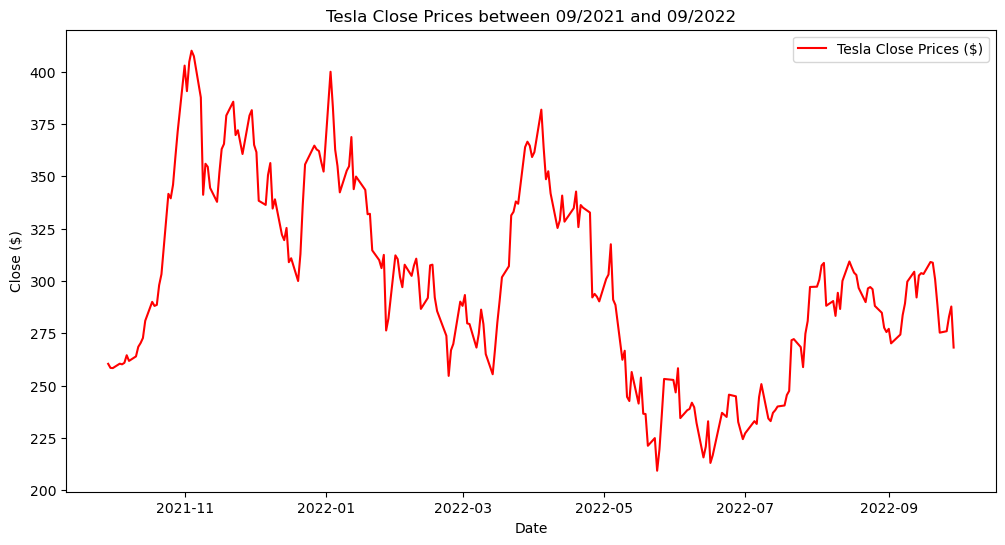

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(Tesla_closed.index, Tesla_closed, label='Tesla Close Prices ($)', color='red')
plt.title('Tesla Close Prices between 09/2021 and 09/2022')
plt.xlabel('Date')
plt.ylabel('Close ($)')
plt.legend()
plt.show()

In [17]:
mean_tesla_close = Tesla_closed.mean()
std_deviation = Tesla_closed.std()
print(mean_tesla_close)
print(std_deviation)

299.70910395652174
45.788282709532616


In [18]:
rolling_mean = Tesla_closed.rolling(window=5).mean()

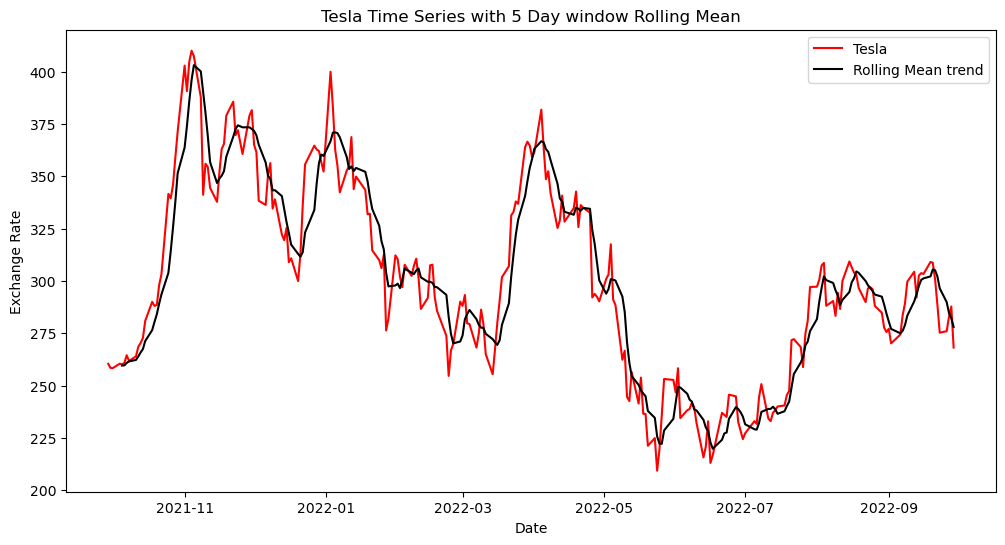

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(Tesla_closed.index, Tesla_closed, label='Tesla', color='red')
plt.plot(rolling_mean.index, rolling_mean, label='Rolling Mean trend', color='black')
plt.title('Tesla Time Series with 5 Day window Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [20]:
Tesla_closed_series = Tesla[['Close']]
Tesla_closed_series

,Close
Date,
2021-09-29,260.436676
2021-09-30,258.493347
2021-10-01,258.406677
2021-10-04,260.510010
2021-10-05,260.196655
...,...
2022-09-23,275.329987
2022-09-26,276.010010
2022-09-27,282.940002


In [21]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error

# Normalize the data
scaler = MinMaxScaler()
Tesla_closed_series= scaler.fit_transform(Tesla_closed_series)

# Split the data into training and testing sets
train_size = int(len(Tesla_closed_series) * 0.80)
test_size = len(Tesla_closed_series) - train_size
train_data, test_data = Tesla_closed_series[0:train_size], Tesla_closed_series[train_size:len(Tesla_closed_series)]

# Create sequences for time series forecasting
def create_sequences(Tesla_closed_series, look_back):
    X, y = [], []
    for i in range(len(Tesla_closed_series) - look_back):
        X.append(Tesla_closed_series[i:(i+look_back), 0])
        y.append(Tesla_closed_series[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 10  # Number of previous time steps to use for prediction
X_train, y_train = create_sequences(train_data, look_back)
X_test, y_test = create_sequences(test_data, look_back)

# Create and compile the LSTM model
model = Sequential()
model.add(LSTM(units=64, activation='relu', return_sequences=True, input_shape=(look_back, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=64, activation='relu'))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=2000, batch_size=32)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions to the original scale
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# Calculate RMSE (Root Mean Squared Error) to evaluate the model
train_score = np.sqrt(mean_squared_error(y_train[0], train_predict[:, 0]))
test_score = np.sqrt(mean_squared_error(y_test[0], test_predict[:, 0]))
print(f"Train RMSE: {train_score:.4f}")
print(f"Test RMSE: {test_score:.4f}")

Epoch 1/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.2506
Epoch 2/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.1424
Epoch 3/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0453
Epoch 4/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0428
Epoch 5/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0250
Epoch 6/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0285
Epoch 7/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0243
Epoch 8/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0227
Epoch 9/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0211
Epoch 10/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0215
Epoch 11/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0197
Epoch 12/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0200
Epoch 13/2000
6/6 [==============================

6/6 [==============================] - 0s 5ms/step - loss: 0.0073
Epoch 104/2000
6/6 [==============================] - 0s 6ms/step - loss: 0.0070
Epoch 105/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0073
Epoch 106/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0077
Epoch 107/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0068
Epoch 108/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0065
Epoch 109/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0075
Epoch 110/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0077
Epoch 111/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0070
Epoch 112/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0067
Epoch 113/2000
6/6 [==============================] - 0s 6ms/step - loss: 0.0073
Epoch 114/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0065
Epoch 115/2000
6/6 [=======================

6/6 [==============================] - 0s 5ms/step - loss: 0.0056
Epoch 205/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0054
Epoch 206/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0062
Epoch 207/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0055
Epoch 208/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0052
Epoch 209/2000
6/6 [==============================] - 0s 6ms/step - loss: 0.0055
Epoch 210/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0049
Epoch 211/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0048
Epoch 212/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0047
Epoch 213/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0054
Epoch 214/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0049
Epoch 215/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0054
Epoch 216/2000
6/6 [=======================

6/6 [==============================] - 0s 5ms/step - loss: 0.0044
Epoch 306/2000
6/6 [==============================] - 0s 6ms/step - loss: 0.0039
Epoch 307/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0053
Epoch 308/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0053
Epoch 309/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0048
Epoch 310/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0049
Epoch 311/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0045
Epoch 312/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0046
Epoch 313/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0049
Epoch 314/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0048
Epoch 315/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0052
Epoch 316/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0046
Epoch 317/2000
6/6 [=======================

6/6 [==============================] - 0s 5ms/step - loss: 0.0040
Epoch 407/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0042
Epoch 408/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0048
Epoch 409/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0049
Epoch 410/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0046
Epoch 411/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0042
Epoch 412/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0041
Epoch 413/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0041
Epoch 414/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0043
Epoch 415/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0050
Epoch 416/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0045
Epoch 417/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0042
Epoch 418/2000
6/6 [=======================

6/6 [==============================] - 0s 5ms/step - loss: 0.0040
Epoch 508/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0038
Epoch 509/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0040
Epoch 510/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0043
Epoch 511/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0040
Epoch 512/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0040
Epoch 513/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0036
Epoch 514/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0038
Epoch 515/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0036
Epoch 516/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0040
Epoch 517/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0036
Epoch 518/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0037
Epoch 519/2000
6/6 [=======================

6/6 [==============================] - 0s 5ms/step - loss: 0.0034
Epoch 609/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0032
Epoch 610/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0036
Epoch 611/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0035
Epoch 612/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0036
Epoch 613/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0037
Epoch 614/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0036
Epoch 615/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0033
Epoch 616/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0038
Epoch 617/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0035
Epoch 618/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0034
Epoch 619/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0041
Epoch 620/2000
6/6 [=======================

6/6 [==============================] - 0s 5ms/step - loss: 0.0037
Epoch 710/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0038
Epoch 711/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0034
Epoch 712/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0035
Epoch 713/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0037
Epoch 714/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0033
Epoch 715/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0032
Epoch 716/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0033
Epoch 717/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0033
Epoch 718/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0037
Epoch 719/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0033
Epoch 720/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0034
Epoch 721/2000
6/6 [=======================

6/6 [==============================] - 0s 5ms/step - loss: 0.0035
Epoch 811/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0037
Epoch 812/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0036
Epoch 813/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0032
Epoch 814/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0034
Epoch 815/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0033
Epoch 816/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0031
Epoch 817/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0035
Epoch 818/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0032
Epoch 819/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0034
Epoch 820/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0032
Epoch 821/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0035
Epoch 822/2000
6/6 [=======================

6/6 [==============================] - 0s 5ms/step - loss: 0.0035
Epoch 912/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0030
Epoch 913/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0033
Epoch 914/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0036
Epoch 915/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0032
Epoch 916/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0031
Epoch 917/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0029
Epoch 918/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0035
Epoch 919/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0030
Epoch 920/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0033
Epoch 921/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0027
Epoch 922/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0027
Epoch 923/2000
6/6 [=======================

6/6 [==============================] - 0s 5ms/step - loss: 0.0023
Epoch 1013/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0027
Epoch 1014/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0025
Epoch 1015/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0033
Epoch 1016/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0029
Epoch 1017/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0024
Epoch 1018/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0032
Epoch 1019/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0031
Epoch 1020/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0028
Epoch 1021/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0028
Epoch 1022/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0028
Epoch 1023/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0030
Epoch 1024/2000
6/6 [===========

6/6 [==============================] - 0s 4ms/step - loss: 0.0023
Epoch 1113/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0029
Epoch 1114/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0024
Epoch 1115/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0024
Epoch 1116/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0026
Epoch 1117/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0024
Epoch 1118/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0025
Epoch 1119/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0025
Epoch 1120/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0025
Epoch 1121/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0024
Epoch 1122/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0023
Epoch 1123/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0024
Epoch 1124/2000
6/6 [===========

6/6 [==============================] - 0s 4ms/step - loss: 0.0022
Epoch 1213/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0021
Epoch 1214/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0024
Epoch 1215/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0021
Epoch 1216/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0022
Epoch 1217/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0020
Epoch 1218/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0021
Epoch 1219/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0019
Epoch 1220/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0020
Epoch 1221/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0021
Epoch 1222/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0019
Epoch 1223/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0021
Epoch 1224/2000
6/6 [===========

6/6 [==============================] - 0s 4ms/step - loss: 0.0019
Epoch 1313/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0021
Epoch 1314/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0018
Epoch 1315/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0019
Epoch 1316/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0019
Epoch 1317/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0018
Epoch 1318/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0020
Epoch 1319/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0021
Epoch 1320/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0020
Epoch 1321/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0021
Epoch 1322/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0018
Epoch 1323/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0020
Epoch 1324/2000
6/6 [===========

6/6 [==============================] - 0s 5ms/step - loss: 0.0015
Epoch 1413/2000
6/6 [==============================] - 0s 6ms/step - loss: 0.0018
Epoch 1414/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0021
Epoch 1415/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0018
Epoch 1416/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0017
Epoch 1417/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0015
Epoch 1418/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0017
Epoch 1419/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0017
Epoch 1420/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0019
Epoch 1421/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0017
Epoch 1422/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0016
Epoch 1423/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0015
Epoch 1424/2000
6/6 [===========

6/6 [==============================] - 0s 4ms/step - loss: 0.0015
Epoch 1513/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0016
Epoch 1514/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0014
Epoch 1515/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 1516/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0016
Epoch 1517/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0016
Epoch 1518/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0016
Epoch 1519/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 1520/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0015
Epoch 1521/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0016
Epoch 1522/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0017
Epoch 1523/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0016
Epoch 1524/2000
6/6 [===========

6/6 [==============================] - 0s 4ms/step - loss: 0.0019
Epoch 1613/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0023
Epoch 1614/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0022
Epoch 1615/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0027
Epoch 1616/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0022
Epoch 1617/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0020
Epoch 1618/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0022
Epoch 1619/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0020
Epoch 1620/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0018
Epoch 1621/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0015
Epoch 1622/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0015
Epoch 1623/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 1624/2000
6/6 [===========

6/6 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 1713/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0015
Epoch 1714/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0013
Epoch 1715/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0015
Epoch 1716/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 1717/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0014
Epoch 1718/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0013
Epoch 1719/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0013
Epoch 1720/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0015
Epoch 1721/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0023
Epoch 1722/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0025
Epoch 1723/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0037
Epoch 1724/2000
6/6 [===========

6/6 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 1813/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 1814/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0011
Epoch 1815/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 1816/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0011
Epoch 1817/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0010
Epoch 1818/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0011
Epoch 1819/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 1820/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0012
Epoch 1821/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0015
Epoch 1822/2000
6/6 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 1823/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0012
Epoch 1824/2000
6/6 [===========

6/6 [==============================] - 0s 5ms/step - loss: 0.0012
Epoch 1912/2000
6/6 [==============================] - 0s 5ms/step - loss: 9.9081e-04
Epoch 1913/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0011
Epoch 1914/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0012
Epoch 1915/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0010
Epoch 1916/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0010
Epoch 1917/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0011
Epoch 1918/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0010
Epoch 1919/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0012
Epoch 1920/2000
6/6 [==============================] - 0s 4ms/step - loss: 9.7323e-04
Epoch 1921/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0011
Epoch 1922/2000
6/6 [==============================] - 0s 5ms/step - loss: 0.0012
Epoch 1923/2000
6/6 [===

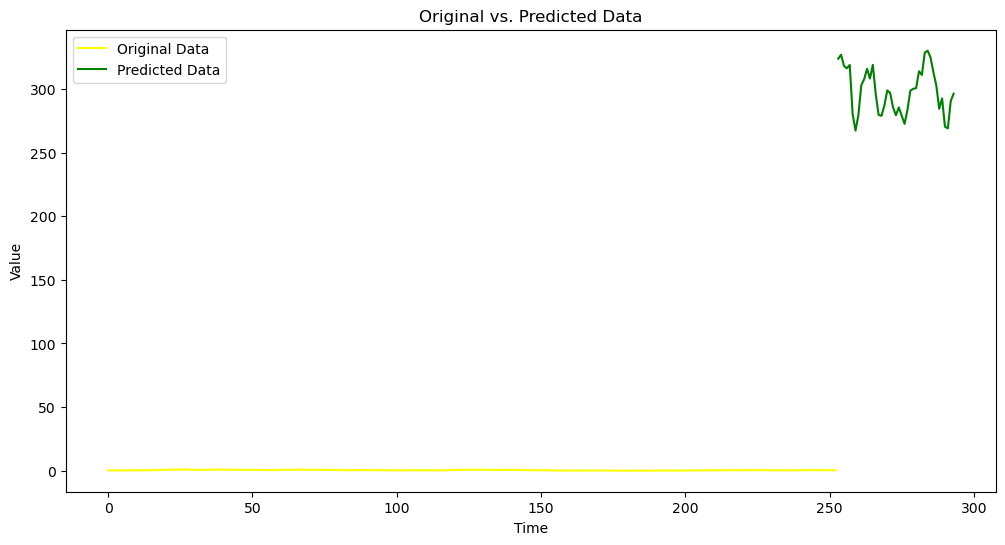

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(Tesla_closed_series)), Tesla_closed_series, label='Original Data', color='Yellow')
plt.plot(np.arange(len(Tesla_closed_series), len(Tesla_closed_series) + len(test_predict)), test_predict, label='Predicted Data', color='green')
plt.legend()
plt.title('Original vs. Predicted Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [23]:
Tesla_predictions= Tesla["Close"]
Tesla_predictions

Date
2021-09-29    260.436676
2021-09-30    258.493347
2021-10-01    258.406677
2021-10-04    260.510010
2021-10-05    260.196655
                 ...    
2022-09-23    275.329987
2022-09-26    276.010010
2022-09-27    282.940002
2022-09-28    287.809998
2022-09-29    268.209991
Name: Close, Length: 253, dtype: float64

In [24]:
log_returns_Tesla = np.log(1+ Tesla_predictions.pct_change())
log_returns_Tesla.head()

Date
2021-09-29         NaN
2021-09-30   -0.007490
2021-10-01   -0.000335
2021-10-04    0.008107
2021-10-05   -0.001204
Name: Close, dtype: float64

In [25]:
mean = log_returns_Tesla.mean()
var = log_returns_Tesla.var()
print(mean)
print(var)

0.00011670824180026673
0.0016524670034425227


In [26]:
stdev = log_returns_Tesla.std()
drift = mean -(0.5 * var) # u = average log return - half variance
drift
stdev

np.array(drift)
norm.ppf(0.95)

1.6448536269514722

In [27]:
x = np.random.rand(10,2) # to complete the second component aka volatility need to randomize using numpy. (10,2) turn our arrray into a multi dimensional one 2 columns by 10 r
x

array([[0.45519296, 0.35007556],
       [0.05022161, 0.7779999 ],
       [0.11804877, 0.07126366],
       [0.03615107, 0.69280818],
       [0.53141384, 0.44319558],
       [0.55370572, 0.062936  ],
       [0.19420681, 0.39317561],
       [0.24859373, 0.61691226],
       [0.82150874, 0.26661884],
       [0.98529629, 0.45326902]])

In [28]:
norm.ppf(x)

array([[-0.11255178, -0.38511649],
       [-1.64270872,  0.76545575],
       [-1.18479748, -1.46644416],
       [-1.79721094,  0.50382603],
       [ 0.07882437, -0.14287214],
       [ 0.13502948, -1.53058494],
       [-0.86249783, -0.27105177],
       [-0.67892172,  0.29738121],
       [ 0.92113008, -0.62307128],
       [ 2.17798153, -0.11740638]])

In [29]:
t_intervals = 730 # tintervals = time intervals. interested in forecast stock prices for next 1000 days
iterations = 5 # asking computer to produce 10 series of future stock price predicitons
daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))
daily_returns

array([[0.92680641, 0.94271005, 0.98022805, 1.03018967, 1.0428944 ],
       [1.06474441, 0.98245892, 0.98075874, 1.03727765, 0.97809444],
       [1.03703563, 1.06681827, 0.94850151, 1.04697697, 0.89290211],
       ...,
       [0.93444433, 0.99991905, 1.04012621, 1.0008108 , 0.97660205],
       [1.02079303, 0.9898964 , 0.95725393, 1.00994072, 1.0900497 ],
       [0.9952654 , 1.0393072 , 0.99707628, 0.9563642 , 0.97637688]])

In [30]:
S0 = Tesla_predictions.iloc[-1]
S0

268.209991

In [31]:
prices_list= np.zeros_like(daily_returns) #zeros_like Return an array of zeros with the same shape and type as a given array
prices_list

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [32]:
prices_list[0] = S0 # 1st row of prices_list must equal S0. as S0 will be the inital price for each of the iterations intended to be generated
prices_list

array([[268.209991, 268.209991, 268.209991, 268.209991, 268.209991],
       [  0.      ,   0.      ,   0.      ,   0.      ,   0.      ],
       [  0.      ,   0.      ,   0.      ,   0.      ,   0.      ],
       ...,
       [  0.      ,   0.      ,   0.      ,   0.      ,   0.      ],
       [  0.      ,   0.      ,   0.      ,   0.      ,   0.      ],
       [  0.      ,   0.      ,   0.      ,   0.      ,   0.      ]])

In [33]:
for t  in range(1, t_intervals): # this loop starts at day 1 and ends of day 1000
  prices_list[t] = prices_list[t-1] * daily_returns[t]

prices_list

array([[268.209991  , 268.209991  , 268.209991  , 268.209991  ,
        268.209991  ],
       [285.575089  , 263.5052982 , 263.04929364, 278.20823049,
        262.33470094],
       [296.15154174, 281.11226729, 249.50265159, 291.27761132,
        234.23920896],
       ...,
       [227.78461282, 102.11334197,  58.49726831, 163.84513991,
        405.31948033],
       [232.52094506, 101.08162988,  55.99674022, 165.473878  ,
        441.81837838],
       [231.4200519 , 105.05486618,  55.8330216 , 158.25329344,
        431.38125089]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


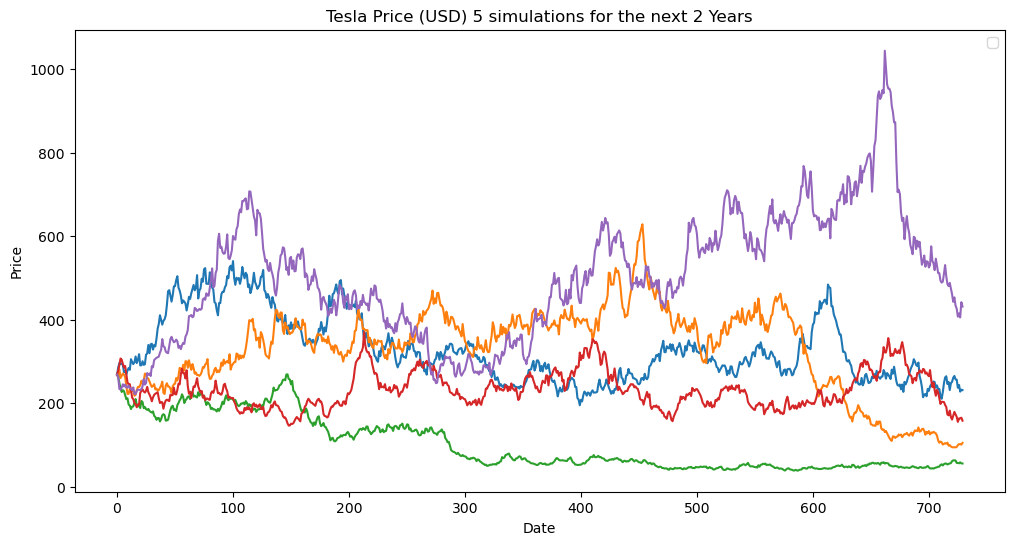

In [34]:
plt.figure(figsize=(12,6))
plt.plot(prices_list)
plt.title('Tesla Price (USD) 5 simulations for the next 2 Years')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()